In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

##Agriculture Dataset


###Reading And Cleaning

In [42]:
# Reading the file
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/ICRISAT-District Level Data.csv')
df.columns = [col.strip().lower().replace(' ','_') for col in df.columns]

# Combining the data
df_sum=df.groupby('year').sum()

# Adjust these if needed based on actual column names
columns_to_keep = ['year', 'production', 'area']

# If actual names are different, try fuzzy match:
columns_to_keep = [col for col in df_sum.columns if re.search(r'(year|commodity|production|area)', col.lower())]

# Now drop all others
df_agri = df_sum[columns_to_keep]

# Viewing the DataFrame
df_agri.head()


,rice_area_(1000_ha),rice_production_(1000_tons),wheat_area_(1000_ha),wheat_production_(1000_tons),kharif_sorghum_area_(1000_ha),kharif_sorghum_production_(1000_tons),rabi_sorghum_area_(1000_ha),rabi_sorghum_production_(1000_tons),sorghum_area_(1000_ha),sorghum_production_(1000_tons),pearl_millet_area_(1000_ha),pearl_millet_production_(1000_tons),maize_area_(1000_ha),maize_production_(1000_tons),finger_millet_area_(1000_ha),finger_millet_production_(1000_tons),barley_area_(1000_ha),barley_production_(1000_tons),chickpea_area_(1000_ha),chickpea_production_(1000_tons),pigeonpea_area_(1000_ha),pigeonpea_production_(1000_tons),minor_pulses_area_(1000_ha),minor_pulses_production_(1000_tons),groundnut_area_(1000_ha),groundnut_production_(1000_tons),sesamum_area_(1000_ha),sesamum_production_(1000_tons),rapeseed_and_mustard_area_(1000_ha),rapeseed_and_mustard_production_(1000_tons),safflower_area_(1000_ha),safflower_production_(1000_tons),castor_area_(1000_ha),castor_production_(1000_tons),linseed_area_(1000_ha),linseed_production_(1000_tons),sunflower_area_(1000_ha),sunflower_production_(1000_tons),soyabean_area_(1000_ha),soyabean_production_(1000_tons),oilseeds_area_(1000_ha),oilseeds_production_(1000_tons),sugarcane_area_(1000_ha),sugarcane_production_(1000_tons),cotton_area_(1000_ha),cotton_production_(1000_tons),fruits_area_(1000_ha),vegetables_area_(1000_ha),fruits_and_vegetables_area_(1000_ha),potatoes_area_(1000_ha),onion_area_(1000_ha),fodder_area_(1000_ha)
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1966,34042.82,29133.23,12489.93,10989.12,11348.11,5486.70,6743.5,3364.0,18101.61,8860.70,12467.38,4540.06,4875.34,4832.23,2464.55,1689.41,2781.57,2293.08,7972.21,3586.08,2534.07,1131.23,14908.48,1786.03,7508.83,4509.05,2204.09,352.73,1262.71,437.43,518.78,-14.63,365.30,84.26,721.68,128.46,-8.21,-9.48,-10.00,-10.00,15890.22,3666.49,2257.42,9361.71,7703.71,862.44,1245.39,1876.46,3136.91,433.66,148.48,7119.48
1967,35012.33,35056.64,14494.64,16006.30,11665.82,6694.08,6705.0,3288.3,18380.82,9992.38,12752.54,5246.99,5360.95,6087.13,2300.30,1726.90,3294.85,3392.73,7979.90,5761.39,2596.25,1683.63,15836.23,1845.42,7712.86,5717.18,2054.49,372.63,1361.23,563.77,530.64,-10.78,402.74,96.76,953.42,204.54,-9.93,-9.98,-10.00,-10.00,16683.15,4232.25,2021.43,9574.38,7676.43,953.06,1250.41,2003.19,3261.57,460.99,146.38,7287.47
1968,34638.05,34701.52,14889.58,17375.67,10917.85,6080.97,6661.3,3222.0,17589.15,9312.97,12323.49,3853.45,5107.30,4485.59,2244.97,1528.89,2708.88,2261.35,6755.24,4008.26,2577.45,1484.97,12430.92,1571.99,7385.74,4663.89,1795.59,313.31,1028.84,442.99,507.05,-8.00,362.19,91.91,909.46,172.11,-9.81,-9.94,-10.00,-10.00,12876.03,3835.23,2524.15,12720.70,7549.46,930.25,1311.00,2101.07,3420.05,486.58,143.15,6488.51
1969,35833.94,35836.01,15923.67,19232.36,10901.02,6039.11,6046.8,2930.9,16957.82,8980.01,12510.80,5516.42,5203.52,4781.64,2328.00,1659.85,2628.55,2600.63,7597.04,5301.76,2647.26,1607.62,12516.86,2689.93,7014.90,5062.63,1759.52,339.80,1151.50,536.73,497.57,-17.15,372.56,97.43,950.90,199.50,-8.36,-9.32,-10.00,-10.00,12688.76,5879.42,2739.87,13719.57,7791.53,937.48,1332.75,2073.15,3413.70,444.38,151.01,6563.66
1970,35909.69,39324.12,17472.15,22677.88,10899.99,5816.05,6429.1,2268.6,17322.29,8084.65,13268.95,8018.16,5580.51,7125.88,2278.79,1879.32,2506.69,2753.04,7773.82,5207.78,2595.44,1826.78,12542.76,2896.13,7580.63,6318.35,1859.07,449.21,1322.27,762.19,621.43,3.88,425.99,129.52,1041.94,223.91,0.80,0.28,4.63,2.16,13733.34,5530.06,2534.11,12381.60,7851.18,860.57,1353.94,2156.78,3510.67,456.71,163.47,6862.55


##Green House Emission Dataset

###Reading And Cleaning

In [47]:
# Reading the file
ghg = pd.read_excel('/content/owid-co2-data.xlsx')
ghg.columns = [col.strip().lower().replace(' ','_') for col in ghg.columns]
ghg.head()

# Filtering out India
ghg_india = ghg[ghg['country']=='India'].reset_index(drop=True)
ghg_india.head()

# Selecting the requier columns
ghg_india_final = ghg_india[['year','cumulative_co2','methane' ]]
ghg_india_final.head()

,year,cumulative_co2,methane
0,1850,NaN,200.839
1,1851,NaN,201.612
2,1852,NaN,202.385
3,1853,NaN,203.159
4,1854,NaN,203.933


##Data Analysis

###Merging and Structuring Datasets

In [52]:
# Merging files
df_merge = pd.merge(df_agri, ghg_india_final, on='year')

# Check structure and columns
df_merge.info()
df_merge.describe()
df_merge.isnull().sum()

# Renaming columns
df_merge.columns = df_merge.columns.str.replace(r'\(.*\)', '', regex=True).str.strip().str.lower().str.replace(' ', '_')
df_merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   year                                         52 non-null     int64  
 1   rice_area_(1000_ha)                          52 non-null     float64
 2   rice_production_(1000_tons)                  52 non-null     float64
 3   wheat_area_(1000_ha)                         52 non-null     float64
 4   wheat_production_(1000_tons)                 52 non-null     float64
 5   kharif_sorghum_area_(1000_ha)                52 non-null     float64
 6   kharif_sorghum_production_(1000_tons)        52 non-null     float64
 7   rabi_sorghum_area_(1000_ha)                  52 non-null     float64
 8   rabi_sorghum_production_(1000_tons)          52 non-null     float64
 9   sorghum_area_(1000_ha)                       52 non-null     float64
 10  sorg

,year,rice_area_,rice_production_,wheat_area_,wheat_production_,kharif_sorghum_area_,kharif_sorghum_production_,rabi_sorghum_area_,rabi_sorghum_production_,sorghum_area_,sorghum_production_,pearl_millet_area_,pearl_millet_production_,maize_area_,maize_production_,finger_millet_area_,finger_millet_production_,barley_area_,barley_production_,chickpea_area_,chickpea_production_,pigeonpea_area_,pigeonpea_production_,minor_pulses_area_,minor_pulses_production_,groundnut_area_,groundnut_production_,sesamum_area_,sesamum_production_,rapeseed_and_mustard_area_,rapeseed_and_mustard_production_,safflower_area_,safflower_production_,castor_area_,castor_production_,linseed_area_,linseed_production_,sunflower_area_,sunflower_production_,soyabean_area_,soyabean_production_,oilseeds_area_,oilseeds_production_,sugarcane_area_,sugarcane_production_,cotton_area_,cotton_production_,fruits_area_,vegetables_area_,fruits_and_vegetables_area_,potatoes_area_,onion_area_,fodder_area_,cumulative_co2,methane
0,1966,34042.82,29133.23,12489.93,10989.12,11348.11,5486.70,6743.50,3364.00,18101.61,8860.70,12467.38,4540.06,4875.34,4832.23,2464.55,1689.41,2781.57,2293.08,7972.21,3586.08,2534.07,1131.23,14908.48,1786.03,7508.83,4509.05,2204.09,352.73,1262.71,437.43,518.78,-14.63,365.30,84.26,721.68,128.46,-8.21,-9.48,-10.00,-10.00,15890.22,3666.49,2257.42,9361.71,7703.71,862.44,1245.39,1876.46,3136.91,433.66,148.48,7119.48,3679.962,481.585
1,1967,35012.33,35056.64,14494.64,16006.30,11665.82,6694.08,6705.00,3288.30,18380.82,9992.38,12752.54,5246.99,5360.95,6087.13,2300.30,1726.90,3294.85,3392.73,7979.90,5761.39,2596.25,1683.63,15836.23,1845.42,7712.86,5717.18,2054.49,372.63,1361.23,563.77,530.64,-10.78,402.74,96.76,953.42,204.54,-9.93,-9.98,-10.00,-10.00,16683.15,4232.25,2021.43,9574.38,7676.43,953.06,1250.41,2003.19,3261.57,460.99,146.38,7287.47,3839.518,486.468
2,1968,34638.05,34701.52,14889.58,17375.67,10917.85,6080.97,6661.30,3222.00,17589.15,9312.97,12323.49,3853.45,5107.30,4485.59,2244.97,1528.89,2708.88,2261.35,6755.24,4008.26,2577.45,1484.97,12430.92,1571.99,7385.74,4663.89,1795.59,313.31,1028.84,442.99,507.05,-8.00,362.19,91.91,909.46,172.11,-9.81,-9.94,-10.00,-10.00,12876.03,3835.23,2524.15,12720.70,7549.46,930.25,1311.00,2101.07,3420.05,486.58,143.15,6488.51,4013.587,494.518
3,1969,35833.94,35836.01,15923.67,19232.36,10901.02,6039.11,6046.80,2930.90,16957.82,8980.01,12510.80,5516.42,5203.52,4781.64,2328.00,1659.85,2628.55,2600.63,7597.04,5301.76,2647.26,1607.62,12516.86,2689.93,7014.90,5062.63,1759.52,339.80,1151.50,536.73,497.57,-17.15,372.56,97.43,950.90,199.50,-8.36,-9.32,-10.00,-10.00,12688.76,5879.42,2739.87,13719.57,7791.53,937.48,1332.75,2073.15,3413.70,444.38,151.01,6563.66,4191.001,500.735
4,1970,35909.69,39324.12,17472.15,22677.88,10899.99,5816.05,6429.10,2268.60,17322.29,8084.65,13268.95,8018.16,5580.51,7125.88,2278.79,1879.32,2506.69,2753.04,7773.82,5207.78,2595.44,1826.78,12542.76,2896.13,7580.63,6318.35,1859.07,449.21,1322.27,762.19,621.43,3.88,425.99,129.52,1041.94,223.91,0.80,0.28,4.63,2.16,13733.34,5530.06,2534.11,12381.60,7851.18,860.57,1353.94,2156.78,3510.67,456.71,163.47,6862.55,4372.723,506.325
5,1971,36412.74,39946.79,18418.09,25280.89,9808.80,5349.11,6906.20,2401.40,16712.90,7747.21,11861.45,5250.84,5349.13,4991.21,2215.77,2006.80,2369.62,2500.39,7874.49,5089.37,2302.89,1588.51,12180.13,3187.57,7954.87,6359.36,1886.37,382.82,1581.92,660.50,782.06,15.56,424.65,138.82,1192.43,273.67,0.62,0.37,0.00,0.00,14794.94,7613.19,2348.25,11664.01,8347.12,1295.85,1094.65,1678.84,2840.42,471.41,145.42,5890.86,4564.687,511.511
6,1972,35554.91,37925.93,18062.22,22879.56,10073.29,5245.39,5014.50,1508.00,15087.79,6753.39,12301.33,3935.34,5489.13,5831.52,2150.93,1695.74,2344.13,2281.57,7048.83,4481.65,2421.51,1785.32,12227.92,2708.40,7462.02,4084.33,1595.24,285.13,1578.71,853.68,520.22,94.35,401.77,120.03,1051.44,229.34,0.12,0.05,0.03,0.02,13702.06,5209.08,2474.67,12573.28,8178.46,1053.83,1248.70,2151.24,3412.72,480.33,146.39,6938.08,4767.723,515.1

###Emission Trends Over Time

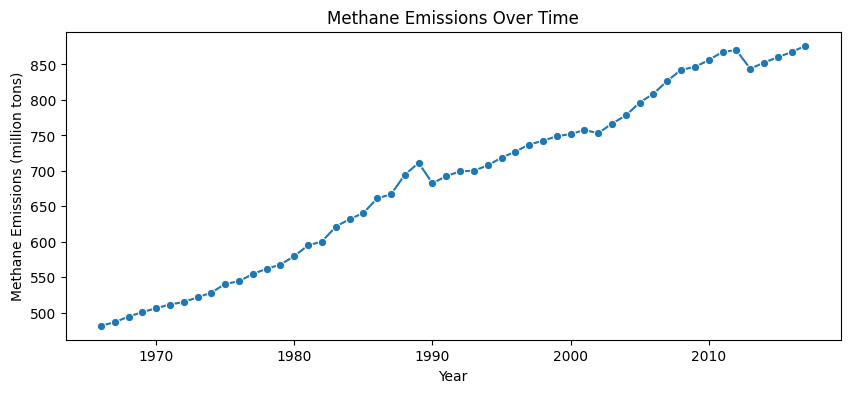

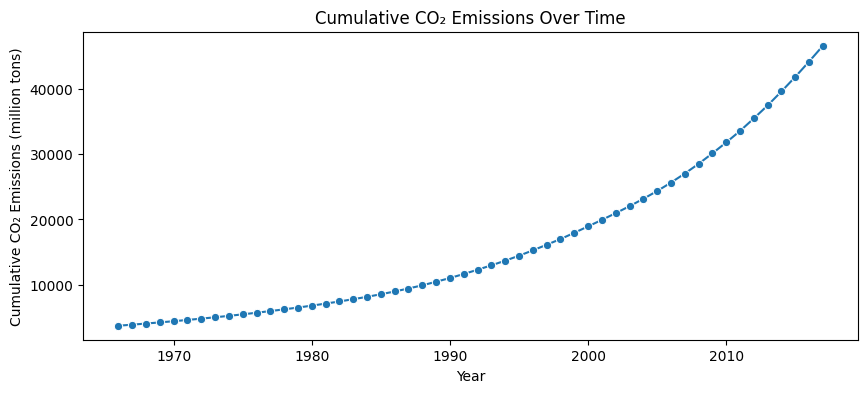

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Methane trend
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_merge, x='year', y='methane', marker='o')
plt.title('Methane Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Methane Emissions (million tons)')
plt.savefig('methane_trend.png')
plt.show()

# CO₂ trend
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_merge, x='year', y='cumulative_co2', marker='o')
plt.title('Cumulative CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative CO₂ Emissions (million tons)')
plt.savefig('co2_trend.png')
plt.show()

###Total Crop Area Over Time

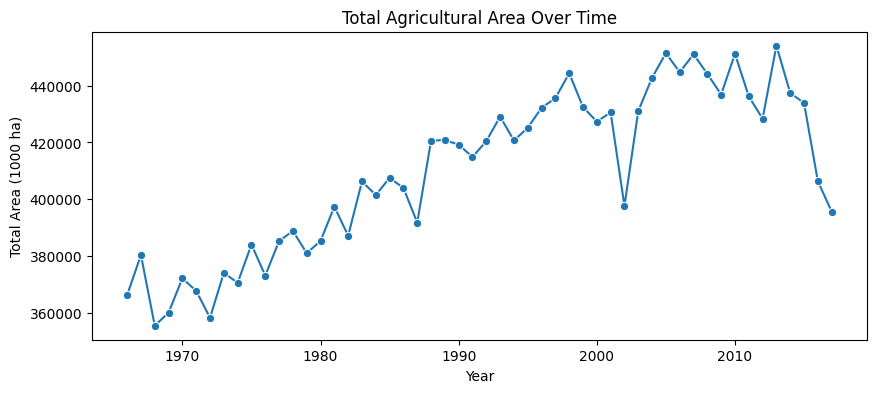

In [62]:
# Extract only area columns
area_cols = [col for col in df_merge.columns if 'area' in col and 'year' not in col]
df_merge['total_area'] = df_merge[area_cols].sum(axis=1)

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_merge, x='year', y='total_area', marker='o')
plt.title('Total Agricultural Area Over Time')
plt.xlabel('Year')
plt.ylabel('Total Area (1000 ha)')
plt.savefig('total_area_trend.png')
plt.show()

###Correlation with Emissions

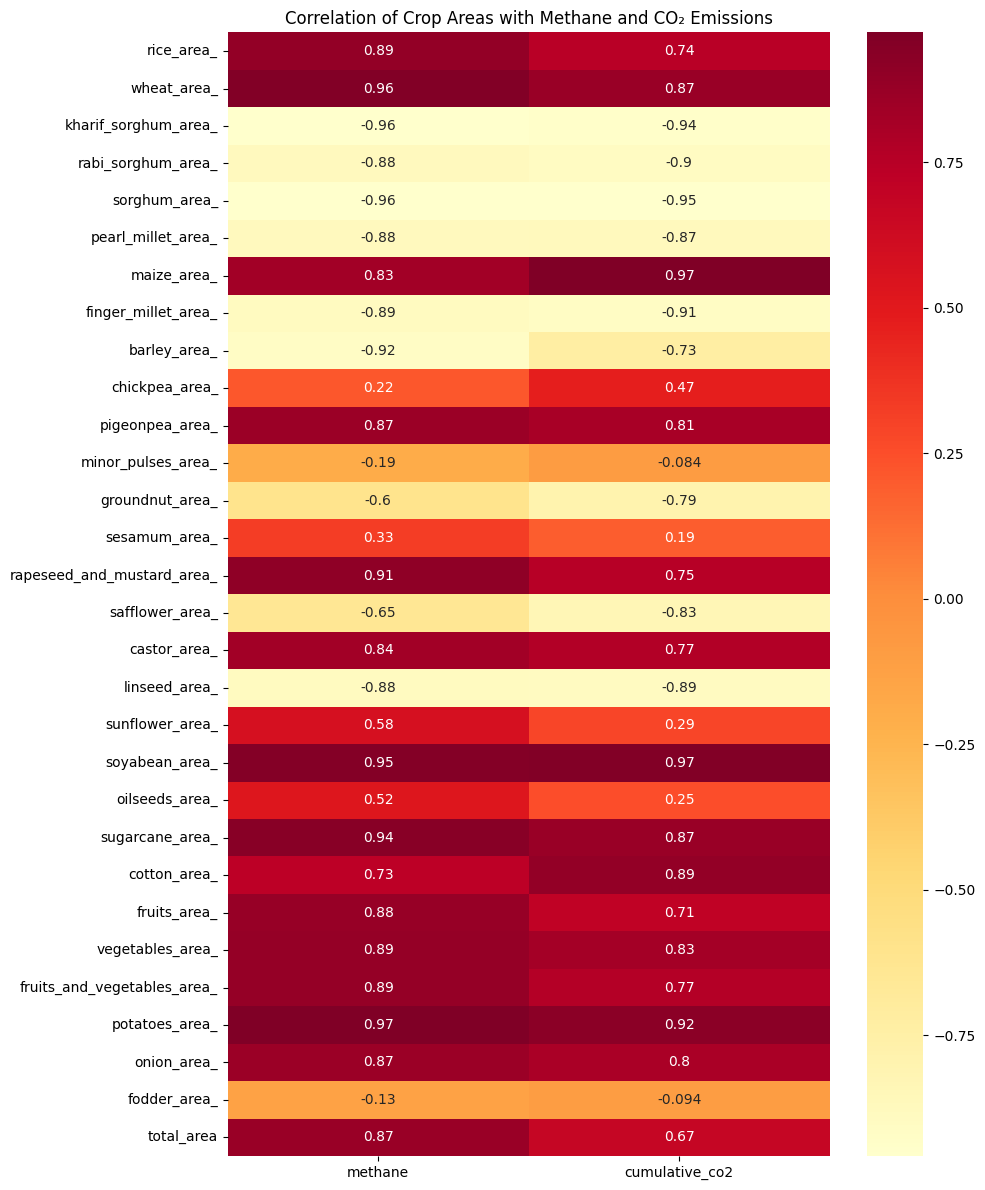

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset area columns + emissions
area_cols = [col for col in df_merge.columns if 'area' in col and 'year' not in col]
correlation_data = df_merge[area_cols + ['methane', 'cumulative_co2']]

# Compute correlation
corr = correlation_data.corr()[['methane', 'cumulative_co2']]

# Plot heatmap
plt.figure(figsize=(10, len(area_cols) * 0.4))
sns.heatmap(corr.drop(['methane', 'cumulative_co2'], errors='ignore'), annot=True, cmap='YlOrRd')
plt.title('Correlation of Crop Areas with Methane and CO₂ Emissions')
plt.tight_layout()
plt.savefig('correlation_area_heatmap.png')
plt.show()

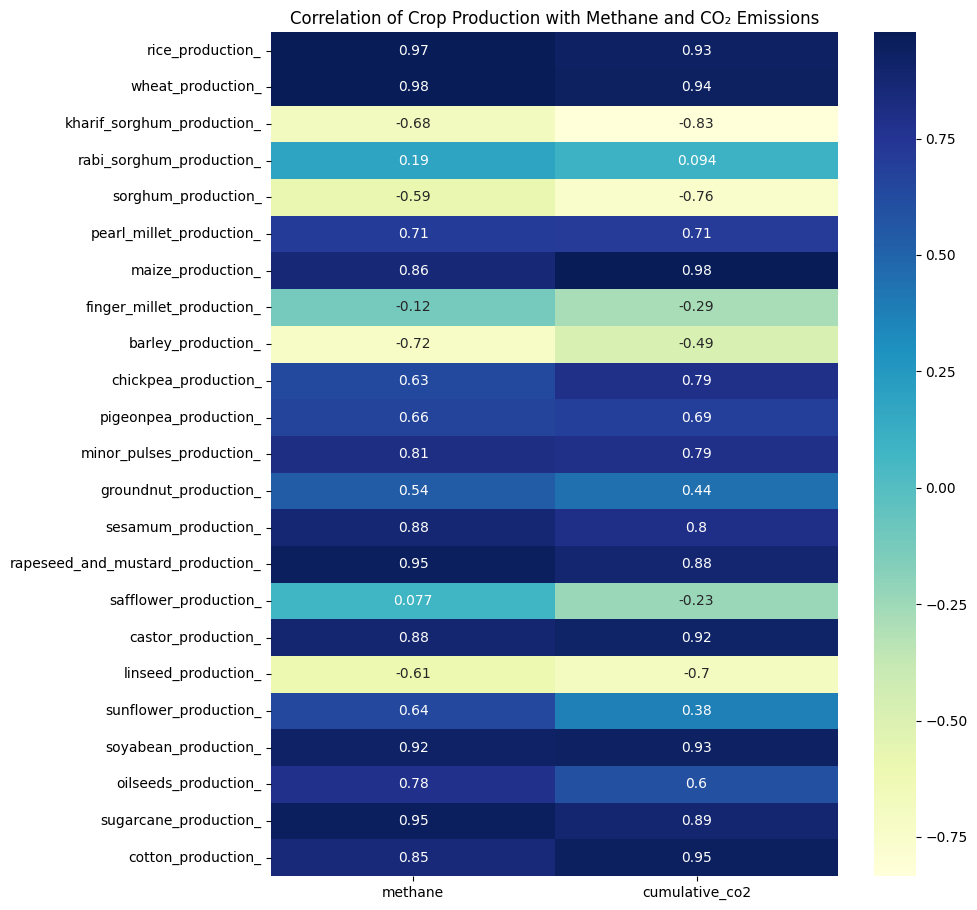

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select production columns
production_cols = [col for col in df_merge.columns if 'production' in col]

# Step 2: Create correlation dataset with emissions
correlation_data = df_merge[production_cols + ['methane', 'cumulative_co2']]

# Step 3: Compute correlation
corr = correlation_data.corr()[['methane', 'cumulative_co2']]

# Step 4: Plot heatmap
plt.figure(figsize=(10, len(production_cols) * 0.4))
sns.heatmap(corr.drop(['methane', 'cumulative_co2'], errors='ignore'), annot=True, cmap='YlGnBu')
plt.title('Correlation of Crop Production with Methane and CO₂ Emissions')
plt.tight_layout()
plt.savefig('correlation_production_heatmap.png')
plt.show()

###Top Contributors

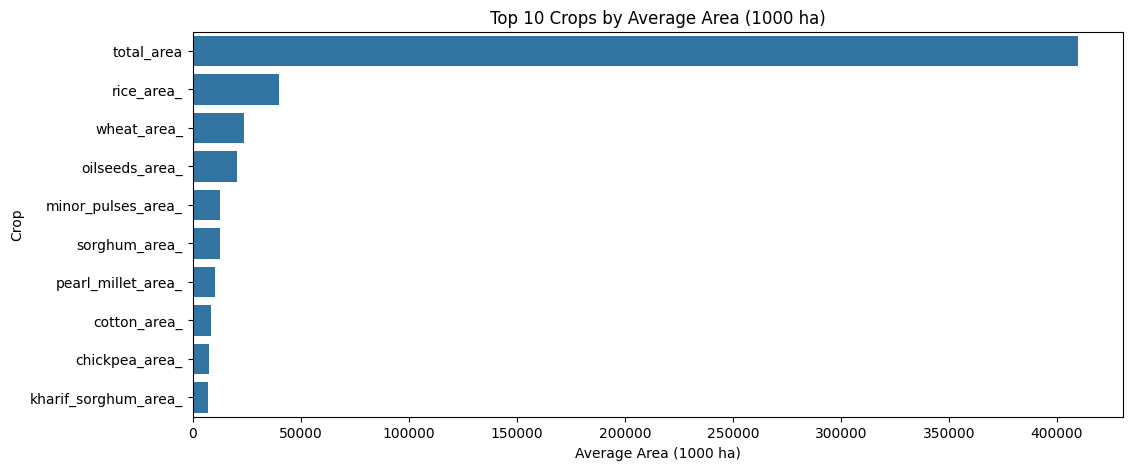

In [65]:
# Average area share per crop
avg_area = df_merge[area_cols].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=avg_area.values, y=avg_area.index)
plt.title('Top 10 Crops by Average Area (1000 ha)')
plt.xlabel('Average Area (1000 ha)')
plt.ylabel('Crop')
plt.savefig('top_crops_by_area.png')
plt.show()